The Chapman-Richards growth function

In [1]:
import numpy as np

def growth_curve(age, A, k, p):
    return A * (1 - np.exp(-k * age))**p

# 1. Data Exploration

Data source: https://doi.org/10.3390/f12070823

In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## 1.1 Norway Spruce

In [3]:
# age
x_data = np.array([14, 18, 28, 43, 43, 43, 99, 99, 99, 105, 114, 119])
# AGB
y_data = np.array([20.99, 31.95, 20.73, 111.71, 112.91, 45.71, 296.97, 104.5, 162.8, 155.73, 199.07, 224.54])

Fit growth curve function and get parameters

In [4]:
params, _ = curve_fit(growth_curve, x_data, y_data, [100, 1, 1])
params

C:\Users\mi92\AppData\Local\Temp\ipykernel_16544\1581336284.py:4: RuntimeWarning: overflow encountered in exp
  return A * (1 - np.exp(-k * age))**p
C:\Users\mi92\AppData\Local\Temp\ipykernel_16544\1581336284.py:4: RuntimeWarning: invalid value encountered in power
  return A * (1 - np.exp(-k * age))**p


array([2.61126612e+02, 1.74074170e-02, 1.78619818e+00])

Visualize the growth curve

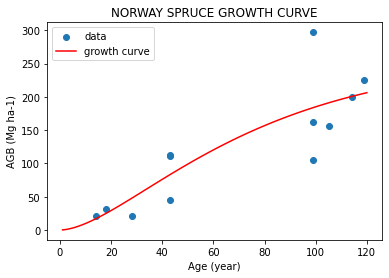

In [5]:
plt.scatter(x_data, y_data, label='data')
x = np.linspace(1, 120, 120)
plt.plot(x, growth_curve(x, *params), 'r-', label='growth curve')

plt.title('NORWAY SPRUCE GROWTH CURVE')
plt.xlabel('Age (year)')
plt.ylabel('AGB (Mg ha-1)')
plt.legend()
plt.show()

## 1.2 European Beech

In [6]:
# age
x_data = np.array([30, 40, 55, 55, 60, 60, 85, 85])
# AGB
y_data = np.array([52.36, 444.5, 130.59, 138.53, 199.45, 38.01, 337.35, 440.36])

In [7]:
params, _ = curve_fit(growth_curve, x_data, y_data, [300, 2.7, 2])
params

C:\Users\mi92\miniconda3\envs\carpathians\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([222.64375,   2.7    ,   2.     ])

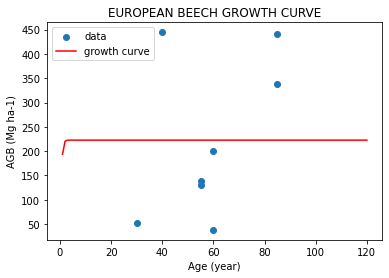

In [8]:
plt.scatter(x_data, y_data, label='data')
x = np.linspace(1, 120, 120)
plt.plot(x, growth_curve(x, *params), 'r-', label='growth curve')

plt.title('EUROPEAN BEECH GROWTH CURVE')
plt.xlabel('Age (year)')
plt.ylabel('AGB (Mg ha-1)')
plt.legend()
plt.show()

## 1.3 Silver Fir

In [9]:
# age
x_data = np.array([33, 45, 60, 60, 75, 85, 91, 115])
# AGB
y_data = np.array([26.02, 108.27, 61.76, 92.54, 246.98, 142.86, 317.32, 226.9])

In [10]:
params, _ = curve_fit(growth_curve, x_data, y_data, [250, 0.3, 1])
params

C:\Users\mi92\AppData\Local\Temp\ipykernel_16544\1581336284.py:4: RuntimeWarning: overflow encountered in exp
  return A * (1 - np.exp(-k * age))**p
C:\Users\mi92\AppData\Local\Temp\ipykernel_16544\1581336284.py:4: RuntimeWarning: invalid value encountered in power
  return A * (1 - np.exp(-k * age))**p


array([2.85665063e+02, 3.96465469e-02, 8.52847805e+00])

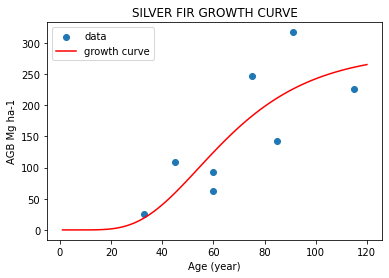

In [11]:
plt.scatter(x_data, y_data, label='data')
x = np.linspace(1, 120, 120)
plt.plot(x, growth_curve(x, *params), 'r-', label='growth curve')

plt.title('SILVER FIR GROWTH CURVE')
plt.xlabel('Age (year)')
plt.ylabel('AGB Mg ha-1')
plt.legend()
plt.show()

# 2. Make csv file

Make a file that will be accepted by Recliner2GCBM

In [12]:
import csv

# parameters from Norway Spruce
def growth_curveNS(age):
    return 2.61126612e+02 * (1 - np.exp(-1.74074170e-02 * age))**1.78619818e+00

In [13]:
agb_values = [growth_curveNS(age) for age in range(201)]
header     = ['LifeZone', 'AIDBSPP'] + list(range(201))
life_zones = ['Boreal wet forest', 'Cool temperate moist forest', 'Cool temperate steppe', 
              'Cool temperate wet forest', 'Polar rain tundra']
species    = 'Norway spruce'

In [14]:
with open('Growth_Curves.csv', 'w') as gc_file:
    gc_writer = csv.writer(gc_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    gc_writer.writerow(header)
    for life_zone in life_zones:
        gc_writer.writerow([life_zone] + [species] + agb_values)

Check

In [15]:
import pandas as pd

data = pd.read_csv('Growth_Curves.csv')
print(data)

                      LifeZone        AIDBSPP    0        1         2  \
0            Boreal wet forest  Norway spruce  0.0  0.18523  0.629055   
1  Cool temperate moist forest  Norway spruce  0.0  0.18523  0.629055   
2        Cool temperate steppe  Norway spruce  0.0  0.18523  0.629055   
3    Cool temperate wet forest  Norway spruce  0.0  0.18523  0.629055   
4            Polar rain tundra  Norway spruce  0.0  0.18523  0.629055   

          3         4         5         6         7  ...         191  \
0  1.277968  2.103788  3.086305  4.209478  5.459891  ...  244.583056   
1  1.277968  2.103788  3.086305  4.209478  5.459891  ...  244.583056   
2  1.277968  2.103788  3.086305  4.209478  5.459891  ...  244.583056   
3  1.277968  2.103788  3.086305  4.209478  5.459891  ...  244.583056   
4  1.277968  2.103788  3.086305  4.209478  5.459891  ...  244.583056   

          192         193         194         195        196         197  \
0  244.864499  245.141223  245.413306  245.680824  2